In [45]:
import pandas as pd

headers = ["SeriousDlqin2yrs","RevolvingUtilizationOfUnsecuredLines","age","NumberOfTime30-59DaysPastDueNotWorse","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"]
gmsc = pd.read_csv("../data/gmsc/gmsc-training.csv")
gmsc_c = pd.read_csv("../data/gmsc/augmented_counterfactuals.csv")
gmsc_d = pd.read_csv("../data/gmsc/augmented_delta_counterfactuals.csv", header=None, names=headers)

target = gmsc.iloc[:,0]
target_c = gmsc_c.iloc[:,0]
counterfactuals = gmsc_c.iloc[:,1:]

<AxesSubplot:>

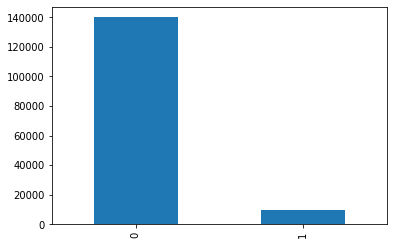

In [27]:
target.value_counts().plot(kind="bar")

<AxesSubplot:>

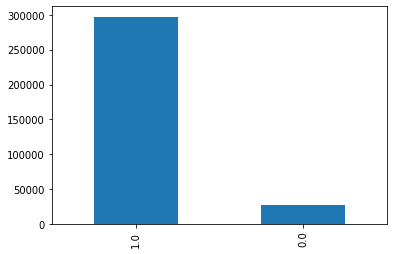

In [28]:
target_c.value_counts().plot(kind="bar")

In [35]:
zero = target.value_counts()[0]
one = target.value_counts()[1]
one / zero

0.07162758798062498

In [34]:
zero = target_c.value_counts()[0]
one = target_c.value_counts()[1]
zero / one

0.09375504601969967

In [36]:
gmsc_c.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,325134.000000,325134.000000,325134.000000,325134.000000,325134.000000,3.251340e+05,325134.000000,325134.000000,325134.000000,325134.000000,325134.000000
mean,0.914281,17.195590,52.129104,0.695350,476.120283,6.228060e+03,8.393902,0.546790,1.043733,0.501602,0.744908
std,0.279948,436.613406,14.714648,6.017876,2547.368254,1.158704e+04,5.319676,6.343071,1.212237,6.225239,1.093628
min,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,41.000000,0.000000,0.000000,3.607000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,52.000000,0.000000,1.000000,5.400000e+03,7.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,62.000000,0.000000,6.000000,7.000000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,100.000000,54.000000,98.000000,20.000000


In [37]:
gmsc.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.100404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


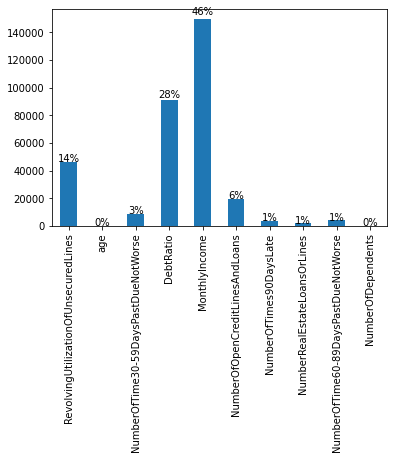

In [48]:
column_count = gmsc_d.iloc[:,1:].astype(bool).sum(axis=0)

count_sum = column_count.to_numpy().sum()
ax = column_count.plot(kind="bar")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{(height/count_sum):.0%}', (x + width/2, y + height*1.02), ha='center')